# 객체 지향 퍼셉트론 API

In [7]:
import numpy as np

In [8]:
class Perceptron(object):
    """
    퍼셉트론 분류기
    
    매개변수
    -----------
    eta : float
        학습률 (0.0과 1.0 사이)
    n_iter : int
        훈련 데이터 셋 반복 횟수(에포크)
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    -----------
    w_ : 1d-array
        학습된 가중치
    errors_ : list
        에포크마다 누적된 부류 오류
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        매개변수
        -----------
        X : {array-like}, shape = [n_sample, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_sample]
            타깃값
            
        반환값
        -----------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)   # 넘파이 난수 생성기
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                             size = 1 + X.shape[1])      # X.shape[1] = 2(꽃잎과 꽃받침) -> 총 3개의 값 추출
        self.errors_ = []
        
        for _ in range(self.n_iter):                 # 훈련데이터 셋 반복
            errors = 0     # 에러 초깃값 0
            for xi, target in zip(X, y):             # zip(X, y)를 한번에 받음. 단, zip()에 있는 변수의 길이가 끝나면 for 구문 끝.
                update = self.eta * (target - self.predict(xi))  # 업데이트할 오류(하나씩!), net_input 함수와 predict 함수 사용
                self.w_[1:] += update * xi           # 가중치의 2번째, 3번째 값에 누적
                self.w_[0] += update                 # 가중치의 1번째 값에 누적
                errors += int(update != 0.0)         # 오류 누적
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]    # 행렬의 곱셈(경영수학) / 조정된 가중치를 가지고 X의 각 값에 곱하고 update를 더함
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   # 음수면 -1 리턴, 양수면 +1 리턴
    
    

In [9]:
# 삼각법
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.linalg.norm(v1) #  v1 벡터의 길이
np.arccos(v1)     # v1의 역코사인 삼각 함수
v1.dot(v2)        # 벡터의 점곱을 계산 / sum(i * j for i, j in zip(v1, v2))와 같음 / 각각의 벡터끼리 곱하는 것임
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * (np.linalg.norm(v2))))

<ipython-input-9-8605c8bc76dc>:5: RuntimeWarning: invalid value encountered in arccos
  np.arccos(v1)     # v1의 역코사인 삼각 함수


0.0

# 붓꽃 데이터셋에서 퍼셉트론 훈련

OvR(One-versus-Rest) : 이진 분류기를 다중 클래스 문제에 적용 가능

In [10]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


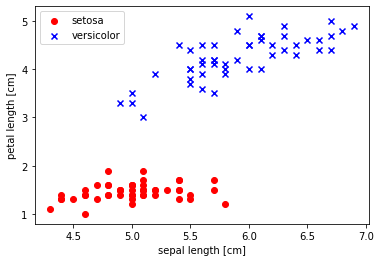

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다. 
y = df.iloc[0:100, 4].values   # df의 4번째 열에서 100번째행까지 값 추출
y = np.where( y == 'Iris-setosa', -1, 1)    # Iris-setosa는 -1, versicaolor는 1

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = df.iloc[0:100, [0, 2]].values   # df의 2, 4번째 열에서 100번째 행까지 값 추출

# 산점도를 그립니다.
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[51:100, 0], X[51:100, 1],
           color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### 퍼셉트론 알고리즘 훈련

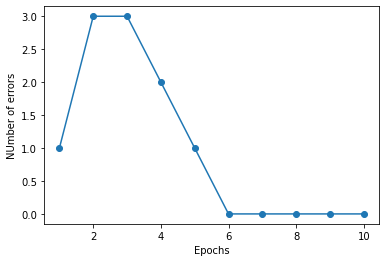

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')   # x축은 훈련 데이터 반복 횟수, y축은 오류개순
plt.xlabel('Epochs')   # 훈련데이터 반복 횟수
plt.ylabel('NUmber of errors')
plt.show()

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    
    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])    # y가 나올 수 있는 값이 3개이기때문에 colors[:3] 즉, red, blue, lightgreen 출력
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1      # X의 1번째 열
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1      # X의 2번째 열
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)    # matplotlib의 등고선 그리기
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도를 그립니다.
    for idx, cl in enumerate(np.unique(y)):   # enumerate : 인덱스와 값을 함께 출력해준다. index, value 순서!
        plt.scatter(x = X[y == cl, 0],
                   y =X[y == cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
    

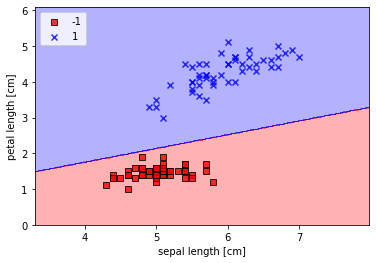

In [14]:
plot_decision_regions(X, y, classifier = ppn)   # ppn을 식별자로 그리드를 그려라~
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

# 아달린 구현

In [23]:
class AdalineGD(object):
    """ 적응형 선형 뉴런 분류기
    
    매개변수
    ------------
    eta = float
        학습률 (0.0과 1.0 사이)
    n_iter = int
        훈련 데이터셋 반복 횟수 (에포크 횟수)
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    ------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ 훈련데이터 학습
        
        매개변수
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타깃 값
            
        반환값
        ------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)  # X.T.dot(errors) : 특성행렬과 오차 벡터 간의 행렬-벡터 곱셈
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        # 최종 입력 계산
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        # 선형 활성화 계산
        # 해당 식에서는 단순 항등 함수임
        return X
    
    def predict(self, X):
    # 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다.
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

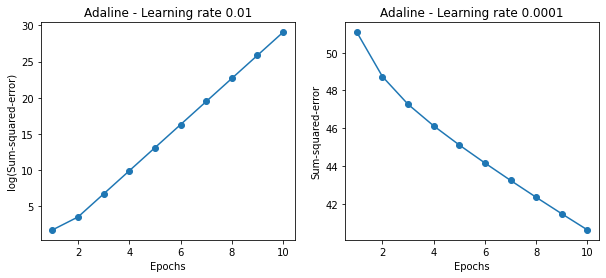

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))  # 2열로 된 subplot 그리기
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),      # 1, 10까지
          np.log10(ada1.cost_), marker ='o')   # np.log10(x) = log10 X임 따라서 np.log10(100) = 2.0
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker = 'o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline - Learning rate 0.0001")
plt.show()

- 학습률이 너무 높은 경우 전역 최솟값을 지나쳐서 오차 증가
- 학습률이 너무 낮은 경우 전역 최솟값에 수렴하기 위해선 많은 에포크 필요